In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('UTSEUS-MOBIKE-shanghai_full.csv', index_col=0)

In [4]:
df.head()

,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track
orderid,,,,,,,,,
1,324731,7541,2016-08-28 00:00,121.490,31.280,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1..."
6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1..."
8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1..."
10,93155,12616,2016-08-28 00:00,121.436,31.320,2016-08-28 00:12,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1..."
11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1..."


Check the dataset by displaying latitude & longitude

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

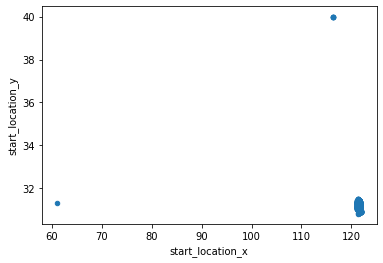

In [6]:
df.plot.scatter(x='start_location_x', y='start_location_y')

In [7]:
sub_df = df[ (df['start_location_x'] > 121.10157) & (df['start_location_x'] < 121.804611) & (df['start_location_y'] > 30.975) & (df['start_location_y'] < 31.514955) ]

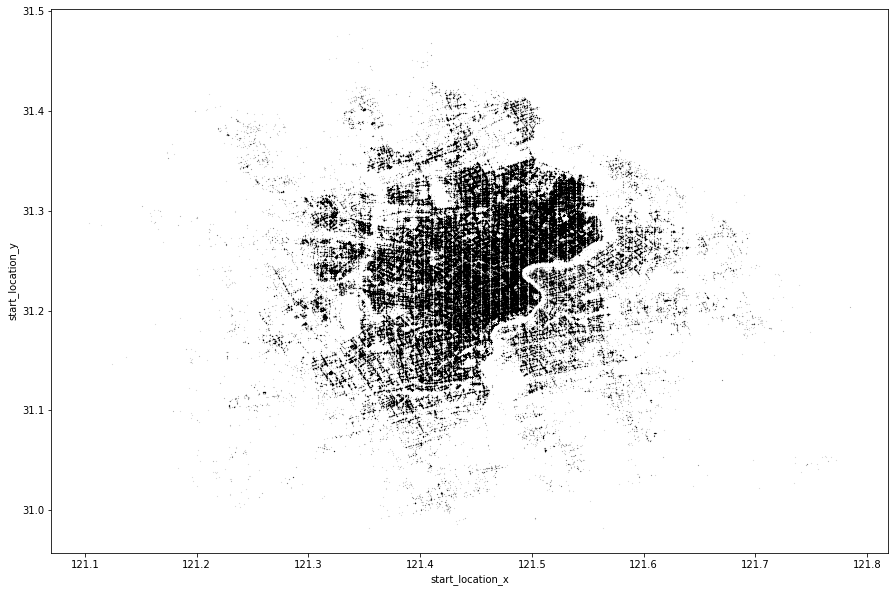

In [8]:
sub_df.plot.scatter(x='start_location_x', y='start_location_y', figsize=(15,10), s=0.02, c='#00000066')

In [9]:
pd.options.mode.chained_assignment = None  # default='warn'

In [10]:
sub_df['start'] = pd.to_datetime(sub_df['start_time'])
sub_df['end'] = pd.to_datetime(sub_df['end_time'])
sub_df['duration'] = sub_df['end'] - sub_df['start']

In [11]:
sub_df.loc[1]

bikeid                                                         324731
userid                                                           7541
start_time                                           2016-08-28 00:00
start_location_x                                               121.49
start_location_y                                                31.28
end_time                                             2016-08-28 00:08
end_location_x                                                121.486
end_location_y                                                 31.273
track               121.485,31.275#121.485,31.276#121.486,31.273#1...
start                                             2016-08-28 00:00:00
end                                               2016-08-28 00:08:00
duration                                              0 days 00:08:00
Name: 1, dtype: object

In [13]:
import os
os.environ["GDAL_DATA"] = '/Users/rami/anaconda3/pkgs/libgdal-2.3.3-h0950a36_0/share/gdal/gcs.csv'

In [18]:
from osgeo import osr

old_crs = osr.SpatialReference()
old_crs.ImportFromEPSG(4326)

new_crs = osr.SpatialReference()
new_crs.ImportFromEPSG(4479)

transform = osr.CoordinateTransformation(old_crs,new_crs)

def getNewLongitude(xy):
    return transform.TransformPoint(xy[0], xy[1])[0]

def getNewLatitude(xy):
    return transform.TransformPoint(xy[0], xy[1])[1]

transform.TransformPoint(121.5353535,39.8888)

#sub_df['longitude'] = sub_df[['start_location_x', 'start_location_y']].apply(getNewLongitude, axis=1)
#sub_df['latitude'] = sub_df[['start_location_x', 'start_location_y']].apply(getNewLatitude, axis=1)

(inf, inf, inf)

In [16]:
sub_df['longitude']

orderid
1          inf
6          inf
8          inf
10         inf
11         inf
13         inf
15         inf
16         inf
17         inf
20         inf
21         inf
22         inf
23         inf
24         inf
28         inf
29         inf
31         inf
33         inf
34         inf
35         inf
36         inf
37         inf
38         inf
41         inf
42         inf
44         inf
45         inf
49         inf
50         inf
51         inf
          ... 
1807814    inf
1807815    inf
1807817    inf
1807818    inf
1807821    inf
1807824    inf
1807825    inf
1807827    inf
1807829    inf
1807830    inf
1807831    inf
1807838    inf
1807840    inf
1807841    inf
1807846    inf
1807848    inf
1807849    inf
1807850    inf
1807851    inf
1807852    inf
1807853    inf
1807854    inf
1807855    inf
1807856    inf
1807858    inf
1807859    inf
1807860    inf
1807863    inf
1807864    inf
1807865    inf
Name: longitude, Length: 1023522, dtype: float64

In [22]:
from pyproj import Transformer
transformer = Transformer.from_crs("EPSG:4326", "EPSG:26917", always_xy=True)
transformer.transform(-80, 50)

(571666.4475041276, 5539109.815175672)